# Exploring raw data

In [1]:
!ls

Aula_12_OCR_Wikipedia_SROIE_v2_Falhou.ipynb  model.py
check_layoutlmt5_model_output.ipynb	     models
cnnt5.py				     models.dvc
data					     __pycache__
data.dvc				     radam.py
dataset.py				     README.md
explore_data.ipynb			     requirements.txt
explore_LayoutLM.ipynb			     transforms.py
LICENSE					     wikipedia.py
metrics.py


In [2]:
import os
import cv2 as cv
import glob
import json
import imageio
import matplotlib.pyplot as plt

In [3]:
with open("data/raw/train/train_v1.0.json") as train_json:
    train_dict = json.load(train_json)

In [4]:
train_dict.keys(), len(train_dict)

(dict_keys(['dataset_name', 'dataset_version', 'dataset_split', 'data']), 4)

In [5]:
len(train_dict["data"])

39463

In [6]:
train_dict["data"][0]

{'questionId': 337,
 'question': 'what is the date mentioned in this letter?',
 'image': 'documents/xnbl0037_1.png',
 'docId': 279,
 'ucsf_document_id': 'xnbl0037',
 'ucsf_document_page_no': '1',
 'answers': ['1/8/93'],
 'data_split': 'train'}

In [7]:
train_dict["dataset_name"], train_dict["dataset_version"], train_dict["dataset_split"], train_dict["data"][0]

('docvqa',
 '1.0',
 'train',
 {'questionId': 337,
  'question': 'what is the date mentioned in this letter?',
  'image': 'documents/xnbl0037_1.png',
  'docId': 279,
  'ucsf_document_id': 'xnbl0037',
  'ucsf_document_page_no': '1',
  'answers': ['1/8/93'],
  'data_split': 'train'})

In [8]:
sample = train_dict["data"][0]
train_path = "data/raw/train/"
image_path = train_path + str(sample["image"])
image = imageio.imread(image_path)

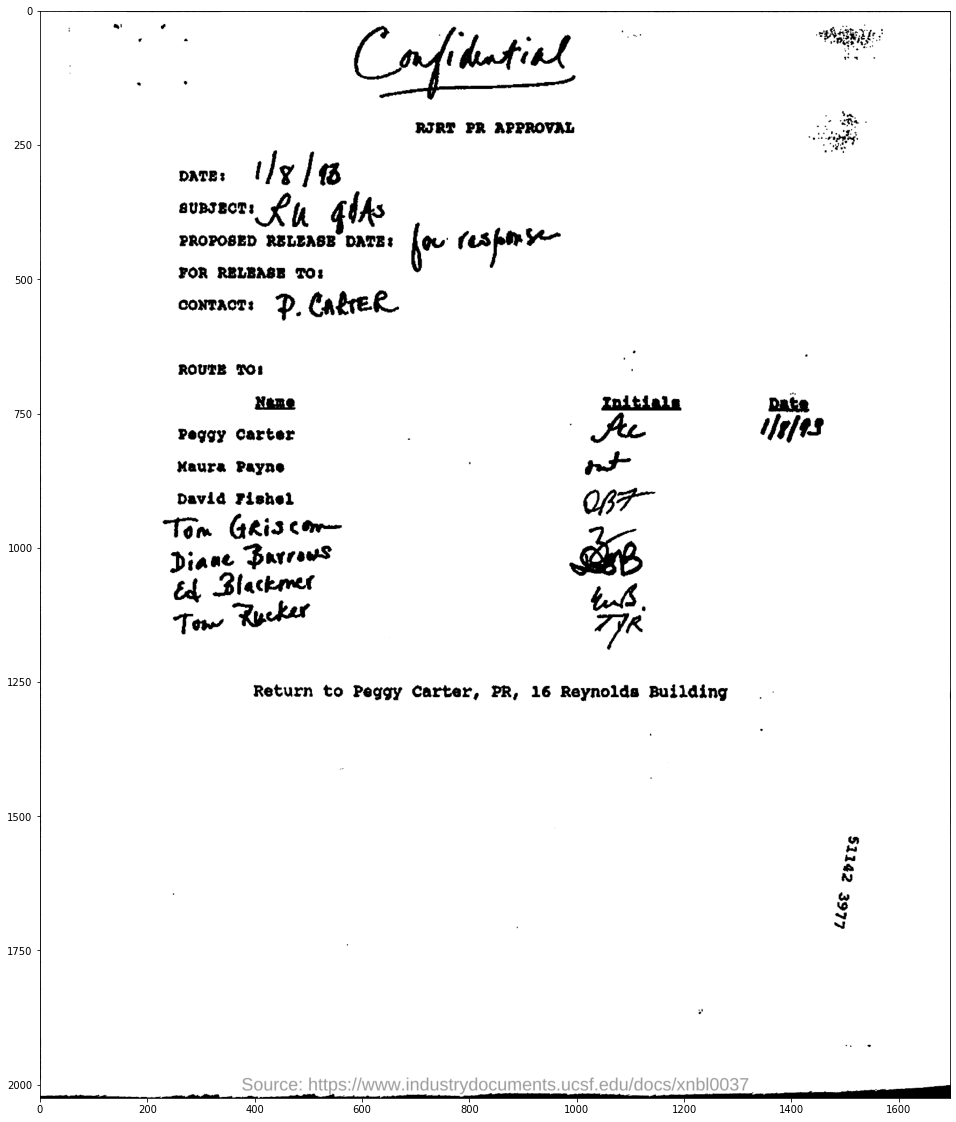

In [9]:
plt.figure(figsize=(20, 20))
plt.imshow(image, cmap="gray")
plt.show()

In [10]:
ocr_path = os.path.join(train_path, "ocr_results", os.path.basename(image_path)[:-4] + ".json")

with open(ocr_path) as ocr_file:
    ocr = json.load(ocr_file)

In [11]:
ocr

{'status': 'Succeeded',
 'recognitionResults': [{'page': 1,
   'clockwiseOrientation': 359.79,
   'width': 1695,
   'height': 2025,
   'unit': 'pixel',
   'lines': [{'boundingBox': [576, 30, 992, 26, 993, 126, 577, 130],
     'text': 'Confidential',
     'words': [{'boundingBox': [586, 30, 993, 36, 994, 119, 584, 131],
       'text': 'Confidential',
       'confidence': 'Low'}]},
    {'boundingBox': [1081, 34, 1124, 31, 1125, 53, 1082, 56],
     'text': '.. ..',
     'words': [{'boundingBox': [1080, 34, 1097, 32, 1099, 54, 1081, 55],
       'text': '..',
       'confidence': 'Low'},
      {'boundingBox': [1102, 32, 1122, 31, 1124, 53, 1103, 54],
       'text': '..'}]},
    {'boundingBox': [695, 202, 994, 204, 994, 236, 694, 234],
     'text': 'RJRT PR APPROVAL',
     'words': [{'boundingBox': [699, 203, 779, 204, 779, 234, 699, 234],
       'text': 'RJRT',
       'confidence': 'Low'},
      {'boundingBox': [793, 204, 832, 204, 832, 234, 793, 234], 'text': 'PR'},
      {'boundingBox': [

In [12]:
nlines = len(ocr['recognitionResults'][0]['lines'])
nlines

27

In [13]:
image.shape, image.max()

((2025, 1695), 255)

Confidential
.. ..
RJRT PR APPROVAL
DATE :
1/8/13
Ru alAs
PROPOSED RELEASE DATE:
for response
FOR RELEASE TO:
CONTACT:
P. CARTER
ROUTE TO
Initials
pate
Peggy Carter
Ac
Maura Payne
David Fishel
Tom GRISCom
Diane Barrows
Ed Blackmer
Tow Rucker
TR
Return to Peggy Carter, PR, 16 Reynolds Building
51142 3977
. .
Source: https://www.industrydocuments.ucsf.edu/docs/xnb10037


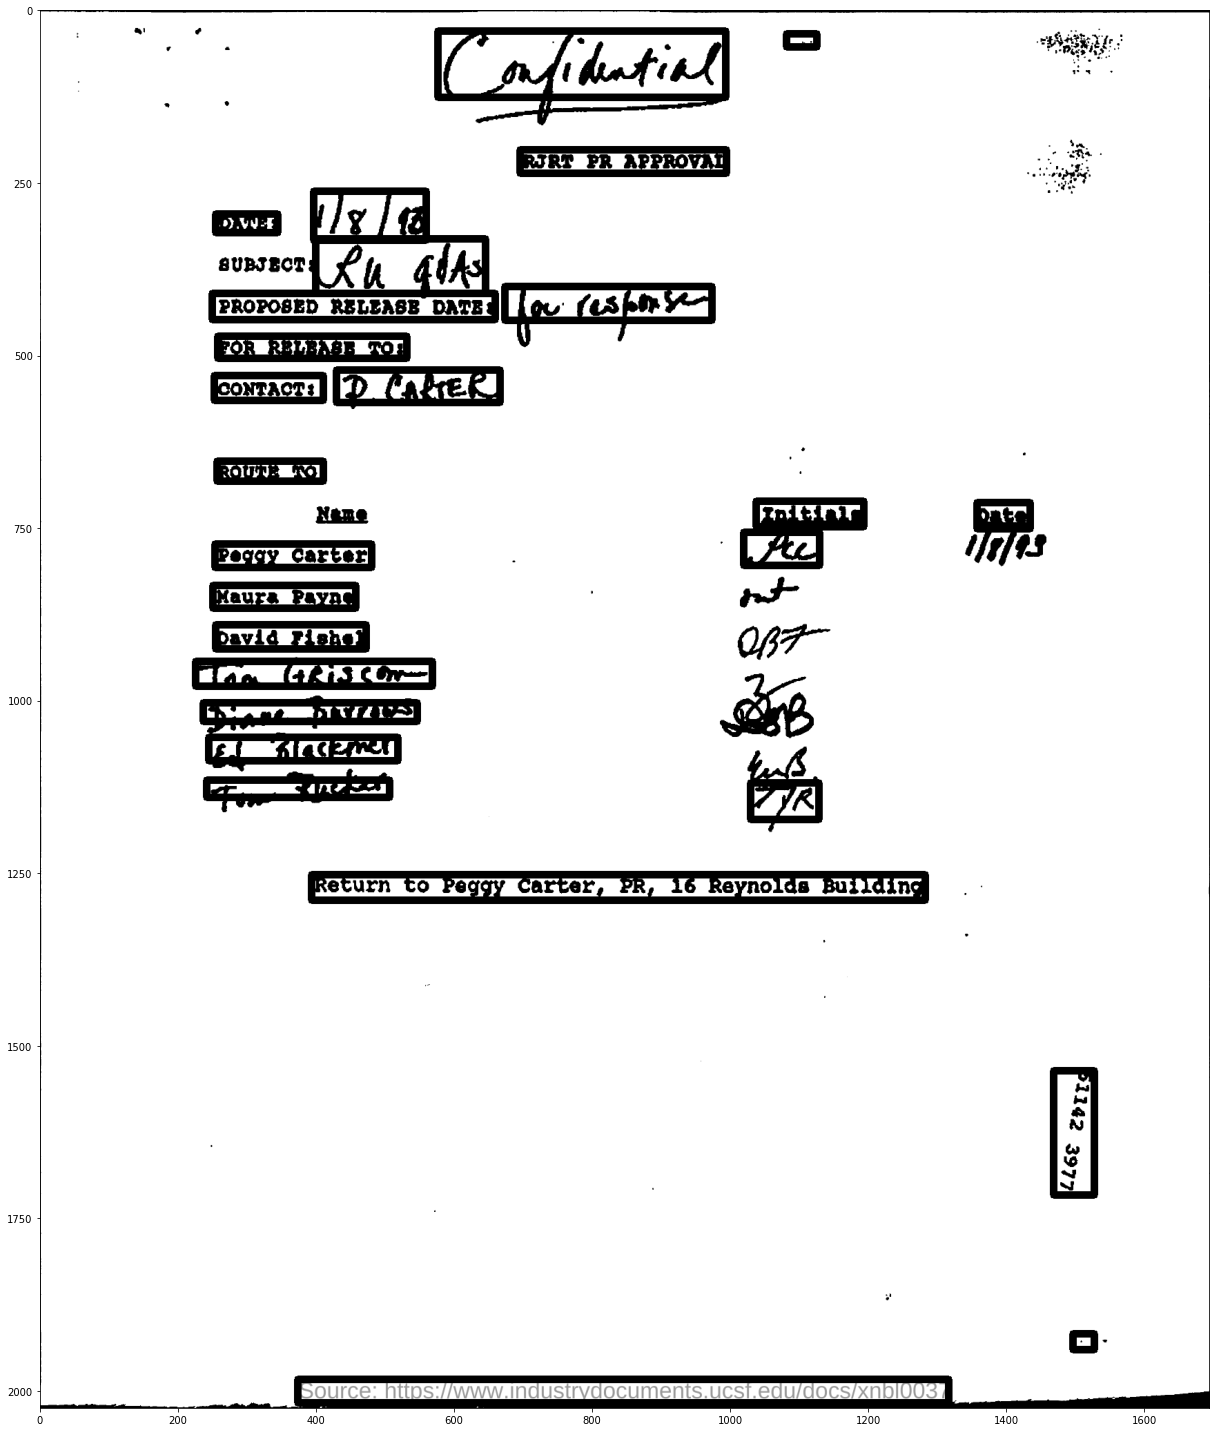

In [19]:
display_bbox = image.copy()
for i in range(nlines):    
    bbox = ocr['recognitionResults'][0]['lines'][i]['boundingBox']
    text = ocr['recognitionResults'][0]['lines'][i]['text']

    pt1 = bbox[:2]
    pt2 = bbox[4:6]
    display_bbox = cv.rectangle(display_bbox, tuple(pt1), tuple(pt2), 0, 10)
    print(text)
plt.figure(figsize=(20, 20))
plt.imshow(display_bbox, cmap="gray")
plt.tight_layout()
plt.savefig("data/ocr_example.pdf")
plt.show()

# Testing dataset class

In [15]:
import random
from dataset import DocVQA
from torch.utils.data import DataLoader, ConcatDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

In [22]:
full_docvqa = DocVQA.full(no_image=True, tokenizer_string="t5-base")

train DocVQA folder data/raw/train tokenizer PreTrainedTokenizer(name_or_path='t5-base', vocab_size=32100, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'additional_special_tokens': ['<extra_id_0>', '<extra_id_1>', '<extra_id_2>', '<extra_id_3>', '<extra_id_4>', '<extra_id_5>', '<extra_id_6>', '<extra_id_7>', '<extra_id_8>', '<extra_id_9>', '<extra_id_10>', '<extra_id_11>', '<extra_id_12>', '<extra_id_13>', '<extra_id_14>', '<extra_id_15>', '<extra_id_16>', '<extra_id_17>', '<extra_id_18>', '<extra_id_19>', '<extra_id_20>', '<extra_id_21>', '<extra_id_22>', '<extra_id_23>', '<extra_id_24>', '<extra_id_25>', '<extra_id_26>', '<extra_id_27>', '<extra_id_28>', '<extra_id_29>', '<extra_id_30>', '<extra_id_31>', '<extra_id_32>', '<extra_id_33>', '<extra_id_34>', '<extra_id_35>', '<extra_id_36>', '<extra_id_37>', '<extra_id_38>', '<extra_id_39>', '<extra_id_40>', '<extra_id_41>', '<extra_id_42>', '<ext

In [23]:
document = random.choice(full_docvqa)
print(document)


{'document': 'NA', 'input_ids': tensor([  822,    10,    84,    19,     8,  1966,   563,    58,  3785,    10,
         6828,   517, 23203,     3, 15582, 19351,   382, 11973, 17184,  4481,
         3072,   309,  6048,  3347,  4083, 14536,    10,  1882, 11558, 17184,
            3, 12200,  6618,  7369, 30176,   350,  4630,  6880,    10, 12615,
        22536,  1531,     3, 15582,  2990, 15296,     3, 24400,  2365,     3,
           10,     3,  6038, 26330, 11430,    71, 13223,     3,    10,  5500,
         1825,    15,   272, 10161, 20750,    10,  1514,  6007,   332,  3177,
         3765,     3,    10,    96, 11500,  1825,    15,  2350,  9557,   121,
            3, 10744,  6294, 22177,    10,   304,   515,  1879,  1157,   478,
           21,  9529,     5,  5097,  5767,  3063,     3,    10,    71,   332,
         8418,    47,  7817,     3,    10, 20612,  2375, 13816,     6,   283,
            5,   308,     5,     3,    18, 11636,  7495,  1191,   107,  1138,
         7248,     7,     6,   2

In [24]:
# Full load test
for doc in tqdm(DataLoader(full_docvqa, batch_size=2, shuffle=False, num_workers=12), leave=True, position=0):
    pass

100%|██████████| 25000/25000 [00:44<00:00, 562.88it/s]
